##### Confirm All Modification Positions Match Reference
* Create positions file with header: `contig	pos	strand	ref_base	variants`

In [1]:
mod_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"


In [2]:
from signalalign.utils.sequenceTools import read_fasta
from py3helpers.seq_tools import ReferenceHandler

yeast_rrna_seq_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa" 

rh = ReferenceHandler(yeast_rrna_seq_path)


In [3]:

exp_bases = {'2’-O-Methyladenosine' : "A",
            '2’-O-Methylcytidine' : "C",
            '2’-O-Methylguanosine' : "G",
            '2’-O-Methyluridine' : "T",
            'C5-Methylcytidine' : "C",
            'N1-Methyladenosine' : "A",
            'N1-methyl-N3-aminocarboxypropyl_pseudouridine' : "T",
            'N3-Methyluridine' : "T",
            'N4-Acetylcytidine' : "C",
            'N6-N6-Dimethyladenosine' : "A",
            'N7-Methylguanosine' : "G",
            'Pseudouridine' : "T", 
            "2’-O-Methyluridine_pseudouridine": "T",
            "2'-O-methylated_pseudouridine_2’-O-Methyluridine" : "T"}

mod_bases = {'2’-O-Methyladenosine' : "a",
        '2’-O-Methylcytidine' : "b",
        '2’-O-Methylguanosine' : "c",
        '2’-O-Methyluridine' : "d",
        'C5-Methylcytidine' : "e",
        'N1-Methyladenosine' : "f",
        'N1-methyl-N3-aminocarboxypropyl_pseudouridine' : "g",
        'N3-Methyluridine' : "h",
        'N4-Acetylcytidine' : "i",
        'N6-N6-Dimethyladenosine' : "j",
        'N7-Methylguanosine' : "k",
        'Pseudouridine' : "l",
        "2'-O-methylated_pseudouridine" : "m",
        "2'-O-methylated_pseudouridine_2’-O-Methyluridine": "m"}


mod_variants = {'2’-O-Methyladenosine' : "Aa",
        '2’-O-Methylcytidine' : "Cb",
        '2’-O-Methylguanosine' : "Gc",
        '2’-O-Methyluridine' : "Td",
        'C5-Methylcytidine' : "Ce",
        'N1-Methyladenosine' : "Af",
        'N1-methyl-N3-aminocarboxypropyl_pseudouridine' : "Tg",
        'N3-Methyluridine' : "Th",
        'N4-Acetylcytidine' : "Ci",
        'N6-N6-Dimethyladenosine' : "Aj",
        'N7-Methylguanosine' : "Gk",
        'Pseudouridine' : "Tl", 
        "2'-O-methylated_pseudouridine_2’-O-Methyluridine": "Tmd"}


In [4]:
def convert_mod_csv_to_positions(mod_csv, positions_file, type1="variants"):
    assert type1 in ("variants", "canonical", "modified", "Omethyl", "pseudoU")
    with open(positions_file, "w") as outfh:
        with open(mod_csv, 'r') as fh:
            fh.readline()
            for line in fh:
                split_line = line.rstrip().split(',')
                contig = split_line[0]
                mod_name = split_line[1]
                pos = int(split_line[2]) - 1
                strand=split_line[4]
                ref_base = rh.get_sequence(contig, pos, pos+1)
                mod_base = mod_bases[mod_name]
                exp_base = exp_bases[mod_name]
                variants = mod_variants[mod_name]
                if ref_base != exp_base:
                    print("ERROR", mod_name, exp_base, pos, ref_base)
                else:
                    if type1=="variants":
                        print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, variants), file=outfh)
                    elif type1=="canonical":
                        print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, ref_base), file=outfh)
                    elif type1=="modified":
                        print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, mod_base), file=outfh)
                    elif type1=="Omethyl":
                        if mod_name.startswith("2’-O"):
                            print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, ref_base), file=outfh) 
                        else:
                            print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, mod_base), file=outfh) 
                    elif type1=="pseudoU":
                        if mod_name.startswith("Pseudouridine"):
                            print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, ref_base), file=outfh) 
                        else:
                            print("{}\t{}\t{}\t{}\t{}".format(contig, pos, strand, ref_base, mod_base), file=outfh)
                    else:
                        raise("This should never be raised")

In [5]:
variants_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
convert_mod_csv_to_positions(mod_csv, variants_path, type1="variants")
canonical_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_canonical.positions"
convert_mod_csv_to_positions(mod_csv, canonical_path, type1="canonical")
modified_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_modified.positions"
convert_mod_csv_to_positions(mod_csv, modified_path, type1="modified")
modified_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_pseudoU_knockdown.positions"
convert_mod_csv_to_positions(mod_csv, modified_path, type1="pseudoU")
modified_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_Omethyl_knockdown.positions"
convert_mod_csv_to_positions(mod_csv, modified_path, type1="Omethyl")


## Create csv for secondary structure visualization 
The resulting CSV files encode modification information which can be visualized at [RiboVision](http://apollo.chemistry.gatech.edu/RiboVision/)


In [6]:
color_coding = {'2’-O-Methyladenosine' : "#008000",
            '2’-O-Methylcytidine' : "#008000",
            '2’-O-Methylguanosine' : "#008000",
            '2’-O-Methyluridine' : "#008000",
            'C5-Methylcytidine' : "#FFA500",
            'N1-Methyladenosine' : "#00FFFF",
            'N1-methyl-N3-aminocarboxypropyl_pseudouridine' : "#00FF00",
            'N3-Methyluridine' : "#0000FF",
            'N4-Acetylcytidine' : "#000080",
            'N6-N6-Dimethyladenosine' : "#800080",
            'N7-Methylguanosine' : "#FF00FF",
            'Pseudouridine' : '#FF0000', 
            "2’-O-Methyluridine_pseudouridine": "#FFFF00",
            "2'-O-methylated_pseudouridine_2’-O-Methyluridine" : "#808080"}

rna_exp_bases = {'2’-O-Methyladenosine' : "A",
            '2’-O-Methylcytidine' : "C",
            '2’-O-Methylguanosine' : "G",
            '2’-O-Methyluridine' : "U",
            'C5-Methylcytidine' : "C",
            'N1-Methyladenosine' : "A",
            'N1-methyl-N3-aminocarboxypropyl_pseudouridine' : "U",
            'N3-Methyluridine' : "U",
            'N4-Acetylcytidine' : "C",
            'N6-N6-Dimethyladenosine' : "A",
            'N7-Methylguanosine' : "G",
            'Pseudouridine' : "U", 
            "2’-O-Methyluridine_pseudouridine": "U",
            "2'-O-methylated_pseudouridine_2’-O-Methyluridine" : "U"}


In [7]:
def write_ribovision_file(mod_csv, ouput_file, subunit):
    assert subunit in ["RDN18-1", "RDN25-1"]
    header = "resNum,DataCol,ColorCol,FontWeight,DataDescription"
    if subunit == "RDN18-1":
        res_num = "18S:{}"
        data_des = "18S modification base landscape"
    else:
        data_des = "25S modification base landscape"
        res_num = "25S:{}"

    with open(ouput_file, 'w') as fh:
        print(header, file=fh)
        with open(mod_csv, "r") as fh2:
            header = fh2.readline()
            first_line = True
            for line in fh2:
                split_line = line.rstrip().split(',')
                contig = split_line[0]
                if contig==subunit:
                    mod = split_line[1]
                    pos = int(split_line[2])
                    percent_mod = float(split_line[3])
                    if first_line:
                        print(",".join([res_num.format(str(pos)), exp_bases[mod], str(color_coding[mod]), str(int(400+(500*(percent_mod/100)))), data_des]), file=fh)
                    else:
                        print(",".join([res_num.format(str(pos)), exp_bases[mod], str(color_coding[mod]), str(int(400+(500*(percent_mod/100))))]), file=fh)
                    first_line = False

In [8]:
ouput_file = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/ribovision/ribovison_18S.csv"
write_ribovision_file(mod_csv, ouput_file, "RDN18-1")
ouput_file = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/ribovision/ribovison_25S.csv"
write_ribovision_file(mod_csv, ouput_file, "RDN25-1")

<IPython.core.display.Javascript object>


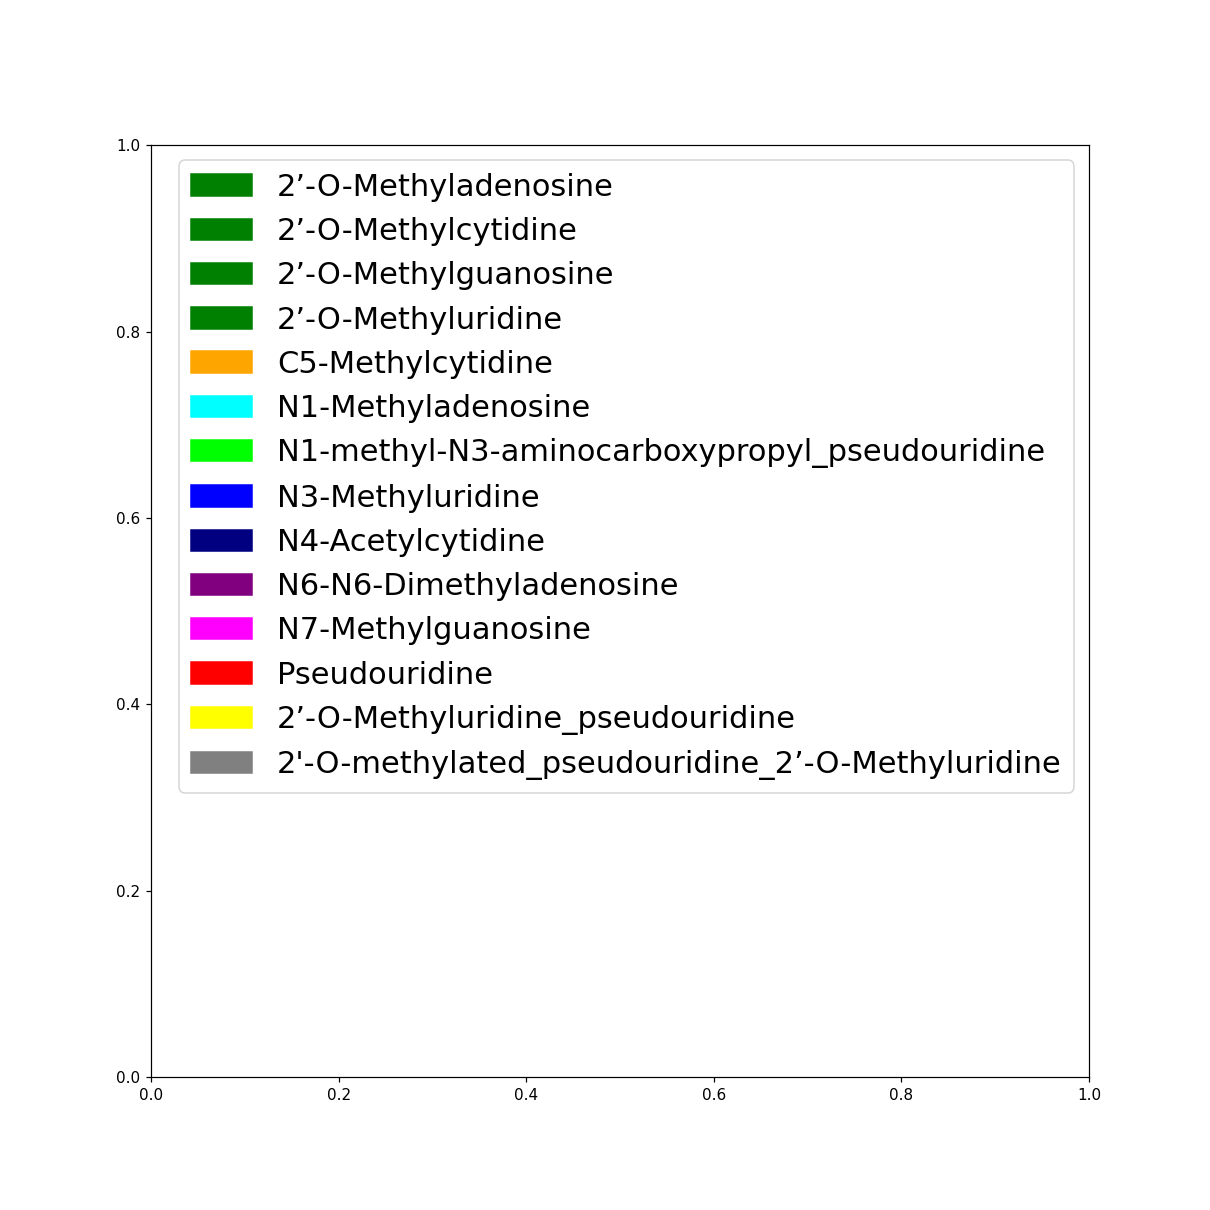

In [11]:
%matplotlib notebook

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

plt.figure(figsize=[11,11])
handles = []
for name, color in color_coding.items():
    handles.append(mpatches.Patch(color=color, label=name))
plt.legend(handles=handles, prop={'size': 20})

# plt.savefig("/Users/andrewbailey/CLionProjects/personal/projects/ares_rRNA/ribovision/mod_color_legend.png")
plt.show()


## Create SA baseline Models


In [13]:
from signalalign.hiddenMarkovModel import HmmModel
import os 

def create_rrna_model(original_rna_model, output_dir, noise=0):
    new_variants = "abcdefghijklm"
    replacement_bases = "ACGTCATTCAGTT"
    alphabet = "ACGT"
    if noise > 0:  
        tmp_rna_model = os.path.join(output_dir, "rna_r94_5mer_{}_noise_"+str(noise)+".model")
    else:
        tmp_rna_model = os.path.join(output_dir, "rna_r94_5mer_{}.model")

    current_model_path = original_rna_model
    for i, (variant, rep_base) in enumerate(zip(new_variants, replacement_bases)):
        alphabet += variant
        rna_model = HmmModel(current_model_path, rna=True)
        print(alphabet)
        rna_model.write_new_model(tmp_rna_model.format(alphabet), alphabet, rep_base,  noise=noise)
        if i > 0:
            os.remove(current_model_path)
        current_model_path = tmp_rna_model.format(alphabet)



In [14]:
original_rna_model = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/models/testModelR9p4_5mer_acgt_RNA_180mv.model"
output_dir = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/models/"
create_rrna_model(original_rna_model, output_dir, noise=0)
create_rrna_model(original_rna_model, output_dir, noise=0.1)


### Kmer lists for Mod Only and mod covered kmers
Create a `training_kmers.txt` file for all possible modified kmers and for all mod AND canonical kmers which are covered by the modified positions.

In [1]:
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import numpy as np
import pandas as pd
import os


mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)


In [2]:
from py3helpers.utils import merge_lists
all_kmers = set().union(*merge_lists(kpm.pos_2_covered_kmers.values()))
mod_kmers = [kmer for kmer in all_kmers if len(set(kmer) - {"A", "T", "G", "C"}) != 0]
mod_k_output = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/kmer_lists/mod_kmers.txt"
all_k_output = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/kmer_lists/all_kmers.txt"


In [5]:
"ACGTc" in all_kmers

True

In [6]:
with open(mod_k_output, 'w') as fh:
    [fh.write(k+"\n") for k in mod_kmers]

with open(all_k_output, 'w') as fh:
    [fh.write(k+"\n") for k in all_kmers]


### Create positions file with variants for low probability mods

In [1]:
import os
import numpy as np
from rrna_analysis.kmer_pos_mapping import KmerPosMapping

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)


output_dir = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/unsupervised_mod_files"

In [46]:
# kpm.mod_handler["change_to"] | kpm.mod_handler["percent"] > 80
# kpm.mod_handler["change_to"]
for min_percent in range(60, 100, 10):
    print(min_percent)
    kpm.mod_handler["new_change_to"] = np.where(kpm.mod_handler['percent'] >= min_percent, kpm.mod_handler["change_to"].str.replace('[ATCG]', '', case=True), kpm.mod_handler["change_to"])
    out_path = os.path.join(output_dir, f"yeast_18S_25S_min_prob_{min_percent}_unsupervised.positions")
    kpm.mod_handler.to_csv(out_path, sep="\t", header=False, columns=["contig", "position", "strand", "change_from", "new_change_to"])

60
70
80
90
